In [1]:
import pandas as pd
import numpy as np

from src.LatentSpace import LatentSpace
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

import umap

from pyarrow import feather

In [2]:
tracks_df = feather.read_feather('data/all_tracks.feather')

In [3]:
latent_space = LatentSpace(autoencoder_path='data/autoencoder_256dim_time_freq_128k_20epochs/',
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        latent_dims=256,
                        num_tiles=32
                        )

Found 278581 files for Generator set


In [4]:
latent_space.load('data/autoencoder_256dim_time_freq_128k_20epochs')

Loaded tracks.
Loaded artists.
Loaded genres.
loaded scaler


In [5]:
id_ = tracks_df.iloc[2]['track_id']
link = tracks_df.iloc[2]['track_preview_link']

In [6]:
link

'https://p.scdn.co/mp3-preview/e5bdcf4b6163a4b0c4f9190ca20ddeb8f811178a?cid=b7c7e6c5cc364f5f895f13ec341ec814'

In [7]:
vector = latent_space.get_vector_from_preview_link(link, id_)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
vector

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,0.789079,0.524071,-0.179364,1.286567,1.120586,-0.415864,-1.20543,-0.373303,-0.672169,-1.362317,...,0.504888,-0.364892,-0.978453,-1.14208,0.519314,-0.794632,0.268503,-0.713705,-0.681193,-0.531452


In [9]:
latent_space.get_similarity(vector, latent_space.tracks, subset=latent_space.latent_cols)[['track_name','track_uri','similarity']]

,track_name,track_uri,similarity
0,Gott schütze die Frauen - Radio Version,spotify:track:5k8nNRu2aOjssNyCPzmax3,0.945159
1,Jackie's Theme,spotify:track:441ynXLPZFfkc8fMMlKATw,0.747264
2,Bailando,spotify:track:0lbPTKhx4koKkCQnND3ayc,0.734816
3,Bili,spotify:track:3qYaOUZ90AvrncTrbifQSi,0.713128
4,The Heaven I Need,spotify:track:1lY8Av0NA8LuLU8Kjb2ThL,0.710188
5,Snowstorm - Original Mix,spotify:track:3ZrHEVUCGJ7D2AjCwVYXI0,0.709858
6,Inside My Soul (feat. Solomon Henderson) - Mar...,spotify:track:18rmWAAFYIpc3U5wiDP8V4,0.709479
7,Fame - Fred Falke Remix,spotify:track:19sRofkZvEU2ZN4hWukvMv,0.708284
8,On The Edge - Original Mix,spotify:track:60Az4zspIUQiWxPBgoVutT,0.703777
9,Dokhtar Biya,spotify:track:3li9xj4ZZc3Lz0PunV7adM,0.703198


In [10]:
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

f = open('data/apikeys/.apikeys.json')
apikeys = json.load(f)
SPOTIPY_CLIENT_ID = apikeys['clientId']
SPOTIPY_CLIENT_SECRET = apikeys['clientSecret']

credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)

spotify = spotipy.Spotify(client_credentials_manager=credentials_manager)

In [52]:
search = 'automatic lover dee d jackson'

In [53]:
id_ = spotify.search(search, type='track')['tracks']['items'][0]['id']
track = spotify.track(id_)
link = track['preview_url']
print(track['name'])
print(track['artists'][0]['name'])
print(link)

Automatic Lover - Original
Dee D. Jackson
https://p.scdn.co/mp3-preview/f674a021e7b35e72ab264cb543479acdf2d57266?cid=5f818fbc1c374e239ee0139163734165


In [54]:
track['popularity']

37

In [55]:
vector = latent_space.get_vector_from_preview_link(link, id_)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
latent_space.get_similarity(vector, latent_space.tracks, subset=latent_space.latent_cols, popularity_threshold=10)[['track_name','track_uri','artist_name','similarity','track_popularity']]


,track_name,track_uri,artist_name,similarity,track_popularity
0,Falling Back - Album Mix,spotify:track:1IzgX4s4qVkuiho44GIC64,Josh Gabriel,0.727757,28
1,Bon'Essoky,spotify:track:7FBRdboOFP746BFZgJkmA5,Salle John,0.719265,14
2,曾經心痛,spotify:track:3rXhK3mxjHzqmImMA44Rbs,Sally Yeh,0.711231,42
3,The Old Man,spotify:track:4rjvSxeKwpVU3RNCttk3Bd,Black Tartan Clan,0.705594,13
4,Automatic lover/Long version,spotify:track:6bA4RtHm4n249OETFGpudi,Dee D. Jackson,0.688151,14
5,Talk of This Town,spotify:track:0SpXbl9lLD70gFZ91rDWOW,Catherine McGrath,0.685320,24
6,Got To Get Your Own '98,spotify:track:4ThcPJ0EEBPc8mtKpE8CEZ,Reuben Wilson,0.677273,27
7,Hieland Harry: Hieland Harry/The Wee Highland ...,spotify:track:42ALhs0ea5w7SUIJtsuMzz,The Tannahill Weavers,0.668134,19
8,Somebody Warm Like Me,spotify:track:0G4YzVBFB6nBlTgBUSOfin,The New Seekers,0.663653,23
9,Do What You Wanna Do,spotify:track:0CXNXQZLjvHzZ9jQFsgKEM,T-Connection,0.660633,22


In [143]:
vector

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,0.958285,1.082059,1.37252,1.104802,-1.170038,-0.82595,-0.70254,0.002635,-1.342122,-1.467761,...,0.545979,-0.840345,-0.455279,0.802136,-0.388858,-0.294722,-0.009544,-0.242467,0.193221,-0.836489


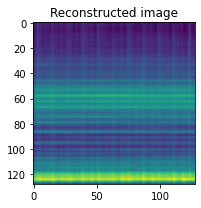

In [51]:
latent_space.plot_reconstruction_from_vector(vector)

In [104]:
latent_space.tracks

,id,filename,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,track_id,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_genres,artist_popularity,release_date
0,2714ySK1pbOIGZwABmRyAz,2714ySK1pbOIGZwABmRyAz.png,-0.931030,-0.627242,0.101877,-0.478947,-0.251039,0.625820,0.492011,0.245462,...,2714ySK1pbOIGZwABmRyAz,"New Phone, Who Dis?",https://p.scdn.co/mp3-preview/8e69de2b8de12b3a...,51,spotify:track:2714ySK1pbOIGZwABmRyAz,Flatbush Zombies,1dqGS5sT6PE2wEvP1gROZC,"[escape room, hip hop, psychedelic hip hop, ra...",57,None
1,2e2aOrLcQTUEXR4hqRmZu5,2e2aOrLcQTUEXR4hqRmZu5.png,1.206389,1.273550,0.557408,0.325929,-0.081681,0.516642,0.388528,-0.636514,...,2e2aOrLcQTUEXR4hqRmZu5,Head up High,https://p.scdn.co/mp3-preview/d7c1a143ef89ce62...,21,spotify:track:2e2aOrLcQTUEXR4hqRmZu5,ReVamp,4LPznDHsWRPbEivBW6aYqv,"[dutch metal, gothic metal, gothic symphonic m...",31,2010-05-28
2,5yoso32yG1Hr7N7bHyqxgP,5yoso32yG1Hr7N7bHyqxgP.png,0.453407,0.416593,1.587540,2.043391,0.452955,-0.940199,1.172614,1.251194,...,5yoso32yG1Hr7N7bHyqxgP,Pippo non lo sa,https://p.scdn.co/mp3-preview/8fc3718642f2d9e8...,12,spotify:track:5yoso32yG1Hr7N7bHyqxgP,Elisa Mutto,2cDzLYTvX8elVX6ET3HkX6,[musica per bambini],27,2006-07-12
3,2ML39pfZ4Put7sFdVC7xS7,2ML39pfZ4Put7sFdVC7xS7.png,1.088135,1.588436,0.318530,-0.424181,-0.586271,-0.366699,0.590407,-1.637880,...,2ML39pfZ4Put7sFdVC7xS7,Ho! Riddim - Funtcase Remix,https://p.scdn.co/mp3-preview/509816634d21e860...,16,spotify:track:2ML39pfZ4Put7sFdVC7xS7,Marco Del Horno,1G0ey7gIOTwRwPF0MwQLzm,[],5,2010-09-24
4,7noCCIGE5wGM6JsU51B3eR,7noCCIGE5wGM6JsU51B3eR.png,0.599516,0.680319,0.226810,-0.012162,-1.036578,-0.090334,-0.514148,-0.163585,...,7noCCIGE5wGM6JsU51B3eR,Critical,https://p.scdn.co/mp3-preview/76139748a05eb4b7...,23,spotify:track:7noCCIGE5wGM6JsU51B3eR,Ikechukwu,7xhdfJjebilccfAhprilhE,"[afro dancehall, igbo pop, naija old school]",21,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278576,2YuDnR6UTqt5MfdQZ7owYr,2YuDnR6UTqt5MfdQZ7owYr.png,-0.141969,-0.228623,-0.765526,0.119331,-0.532499,0.538567,-0.038078,-0.131387,...,2YuDnR6UTqt5MfdQZ7owYr,Mask on My Face,https://p.scdn.co/mp3-preview/04c275e8915a3f14...,15,spotify:track:2YuDnR6UTqt5MfdQZ7owYr,Krucifix Klan,6VGC77ZxkBWORuI4Ac5tkV,[],20,2006-02-16
278577,7wLg1jOa1h14Hg6XDIJyuf,7wLg1jOa1h14Hg6XDIJyuf.png,1.333951,0.999337,1.281820,0.438317,1.391258,-0.022001,0.716352,1.791649,...,7wLg1jOa1h14Hg6XDIJyuf,Goodbye Don't Mean Forever,https://p.scdn.co/mp3-preview/3d94d7870651ce5f...,4,spotify:track:7wLg1jOa1h14Hg6XDIJyuf,Virginia Wolf,0sGu4qiq8w8AJ8K2PGhgnj,[melodic hard rock],9,1986
278578,42XNmKRrnuWDP1aflI0iGu,42XNmKRrnuWDP1aflI0iGu.png,-0.593010,-0.709486,0.669053,-1.109215,0.065182,1.865841,-0.141215,0.290322,...,42XNmKRrnuWDP1aflI0iGu,Flash Flood - Function Remix,https://p.scdn.co/mp3-preview/1f6b0021fe2b5c5d...,10,spotify:track:42XNmKRrnuWDP1aflI0iGu,Infiniti,1sck8r81nA03Ch4xAW1G3w,[techno],14,None
278579,5eCz67w4IRzNAKkF51M2E5,5eCz67w4IRzNAKkF51M2E5.png,0.191761,-0.075300,0.949650,0.327106,0.304808,-0.639967,-0.004349,0.091453,...,5eCz67w4IRzNAKkF51M2E5,Happens All The Time,https://p.scdn.co/mp3-preview/54e236c0eb759247...,2,spotify:track:5eCz67w4IRzNAKkF51M2E5,Pete International Airport,28bZOtbicIuCYNNRQNrbjs,[psych gaze],6,2017-11-17


In [22]:
latent_space.search_for_recommendations('prince baby im a star', num=10)

Baby I'm a Star
Prince
https://p.scdn.co/mp3-preview/1c55d9ca427030051338e5bfe080306156524119?cid=5f818fbc1c374e239ee0139163734165


/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,track_name,track_uri,artist_name,similarity,track_popularity
0,がんばれブロークン・ハート,spotify:track:1RSfRKdyb2aRoO3hmjhDW8,Yumi Tanimura,0.844748,29
1,Flamenco - Harry Romero & Erick Morillo Squirt...,spotify:track:4e7cUDG7TCOvtWqfUqnrnK,Alex Kenji,0.841816,15
2,Halcyon,spotify:track:0aEV5zOV31oi6OxN91a4tR,JJD,0.835278,34
3,Safe and Sound - Noll & Kliwer Club Remix Exte...,spotify:track:1eCpC8N68CStT0FLWW2sZj,Soulshifters,0.834594,11
4,Uptown Girl,spotify:track:5zA8vzDGqPl2AzZkEYQGKh,Billy Joel,0.827272,79
5,Black Cars,spotify:track:6RL5nRfZ2ubP8wIiPOjOSr,Gino Vannelli,0.823174,38
6,幸福下載,spotify:track:0btihjSUYq7wnpHVkizajU,元衛覺醒,0.820517,15
7,Vem Mulher (Drop Da Sarrada Permitida),spotify:track:3Q2G0nKz2LhkIE8p8VzR7u,Heavy Baile,0.812733,42
8,My Love For You,spotify:track:6CH451dZtrFZGL7NT5PbjZ,Kormak,0.811608,26
9,Cuatro direcciones,spotify:track:5mraRzb5hkwu94WYLLnGXi,La Dama Se Esconde,0.811503,15
